In [26]:
import pandas as pd
import streamlit as st


In [27]:
data = { 
'Outlook':    ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 
'Overcast', 'Sunny', 
'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 
'Rain'], 
'Temperature':['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 
'Mild', 
'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'], 
'Humidity':   ['High', 'High', 'High', 'High', 'Normal', 'Normal', 
'Normal', 'High', 
'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'], 
'Wind':       ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 
'Strong', 'Weak', 
'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'], 
'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 
'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No'] 
} 


In [28]:
df = pd.DataFrame(data) 


In [29]:
df


,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [30]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [31]:
# initialize the label_encoders dictionary
label_encoders = {}
df_encoded = df.copy()
# assuming df_encoder and df are defined and column is part of a loop
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df[column])
    label_encoders[column]=le

In [32]:
X = df_encoded.drop('PlayTennis', axis=1)
y = df_encoded['PlayTennis']


In [33]:

# Train model
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X, y)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


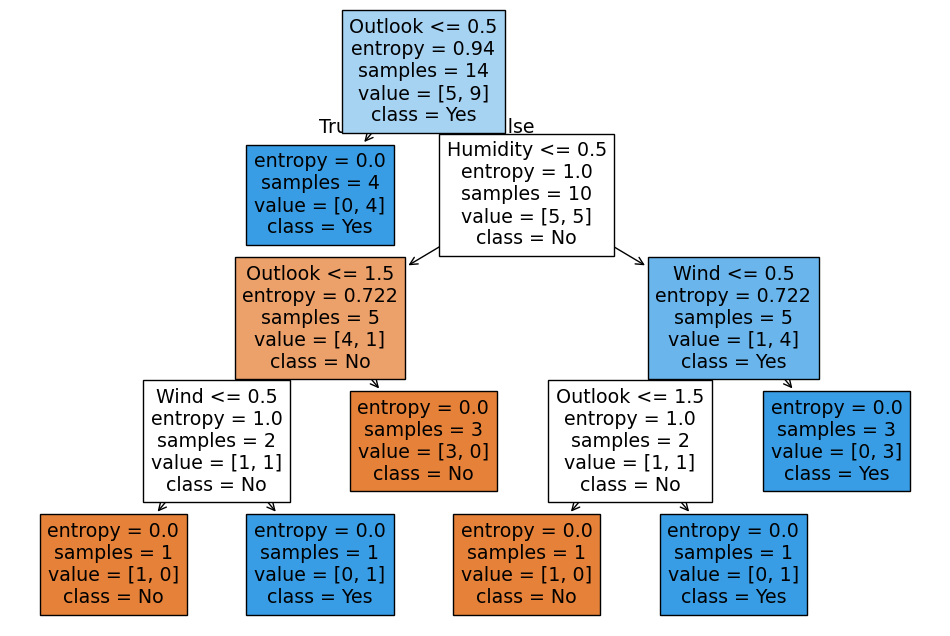

In [34]:
# Plot decision tree
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.show()

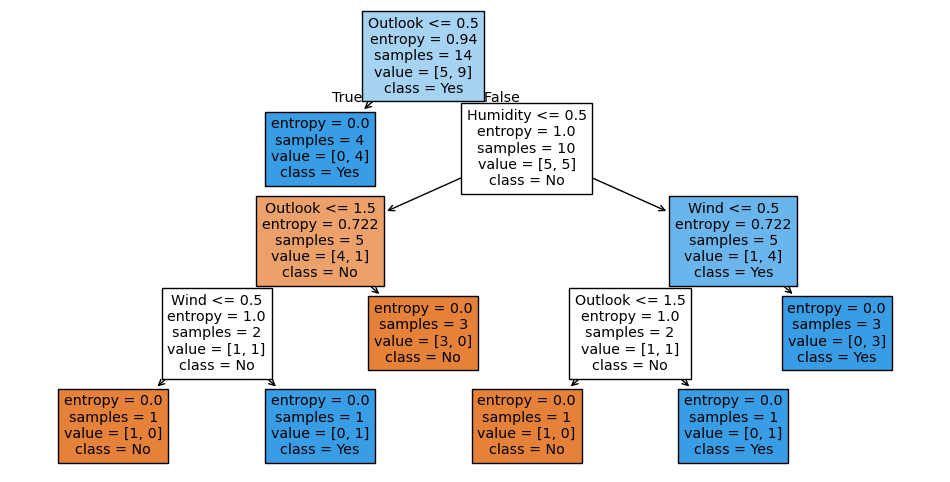

In [35]:
plt.figure(figsize=(12, 6))
plot_tree(model, feature_names=X.columns, class_names=label_encoders['PlayTennis'].classes_, filled=True)
plt.show()

In [36]:
st.title("PlayTennis Prediction with ID3Decision Tree")

2025-07-28 12:01:45.123 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-28 12:01:45.411 
  command:

    streamlit run C:\Users\sanja\AppData\Local\Programs\Python\Python313\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-07-28 12:01:45.412 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-28 12:01:45.413 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [48]:

st.sidebar.header("Input Weather Conditions")

def user_input():
    outlook = st.sidebar.selectbox("Outlook", df['Outlook'].unique())
    temp = st.sidebar.selectbox("Temperature", df['Temperature'].unique())
    humidity = st.sidebar.selectbox("Humidity", df['Humidity'].unique())
    wind = st.sidebar.selectbox("Wind", df['Wind'].unique())

    return pd.DataFrame([[outlook, temp, humidity, wind]],
                        columns=['Outlook', 'Temperature', 'Humidity', 'Wind'])

input_df = user_input()



2025-07-28 12:07:10.298 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-28 12:07:10.299 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-28 12:07:10.299 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-28 12:07:10.300 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-28 12:07:10.301 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-28 12:07:10.303 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-28 12:07:10.304 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-28 12:07:10.304 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [49]:
input_encoded = input_df.copy() 
for col in input_encoded.columns: 
    input_encoded[col] = label_encoders[col].transform(input_encoded[col])

In [50]:
prediction = model.predict(input_encoded)[0] 
prediction_label = label_encoders['PlayTennis'].inverse_transform([prediction])[0] 

In [51]:
st.subheader("Prediction:") 
st.success(f"The model predicts: {prediction_label}") 

2025-07-28 12:07:11.670 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-28 12:07:11.671 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-28 12:07:11.672 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-28 12:07:11.673 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-28 12:07:11.674 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-28 12:07:11.674 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [52]:
st.subheader("Input Values:") 
st.write(input_df) 

2025-07-28 12:07:11.934 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-28 12:07:11.935 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-28 12:07:11.935 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-28 12:07:11.938 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-28 12:07:11.939 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-28 12:07:11.939 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [53]:
st.subheader("Training Data:") 
st.dataframe(df)

2025-07-28 12:07:12.717 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-28 12:07:12.718 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-28 12:07:12.719 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-28 12:07:12.721 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-28 12:07:12.722 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-28 12:07:12.722 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [55]:
!jupyter nbconvert --to script Untitled8.ipynb

[NbConvertApp] Converting notebook Untitled8.ipynb to script
[NbConvertApp] Writing 2976 bytes to Untitled8.py
